In [8]:
pip install nomad-lab


,Requirement already satisfied: aniso8601>=7.0.0 in c:\users\hajar\anaconda3\lib\site-packages (from nomad-lab) (10.0.1)
,Requirement already satisfied: ase~=3.22.0 in c:\users\hajar\anaconda3\lib\site-packages (from nomad-lab) (3.22.1)
,Requirement already satisfied: bitarray>=2.3.5 in c:\users\hajar\anaconda3\lib\site-packages (from nomad-lab) (3.3.1)
,Requirement already satisfied: cachetools>=4.2.4 in c:\users\hajar\anaconda3\lib\site-packages (from nomad-lab) (5.3.3)
,Requirement already satisfied: click>=7.1.2 in c:\users\hajar\anaconda3\lib\site-packages (from nomad-lab) (8.1.7)
,Requirement already satisfied: docstring-parser>=0.12 in c:\users\hajar\anaconda3\lib\site-packages (from nomad-lab) (0.16)
,Requirement already satisfied: elasticsearch-dsl==7.4.0 in c:\users\hajar\anaconda3\lib\site-packages (from nomad-lab) (7.4.0)
,Requirement already satisfied: h5py>=3.6.0 in c:\users\hajar\anaconda3\lib\site-packages (from nomad-lab) (3.11.0)
,Requirement already satisfied: hjson>


,[notice] A new release of pip is available: 24.3.1 -> 25.0.1
,[notice] To update, run: python.exe -m pip install --upgrade pip


header E/ev[1]            ALPHA-Im[2]        ALPHA-Re[3]        ALPHAo-Im[4]       ALPHAo-Re[5]


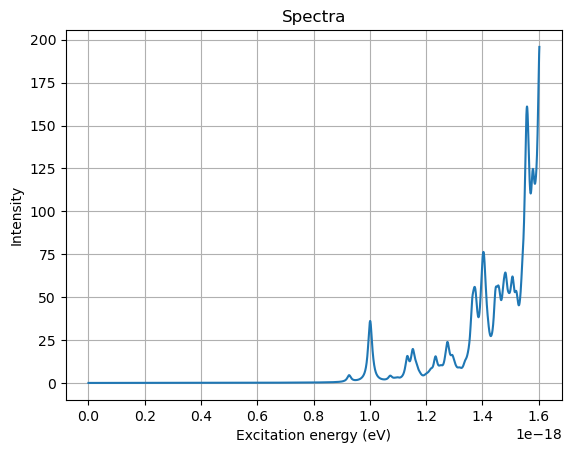

In [138]:
#SECOND VERSION
import numpy as np
import re
from nomad.units import ureg  
from nomad.datamodel.metainfo.simulation.calculation import Spectra
import matplotlib.pyplot as plt

file_path = r"o-R_methylox_TDLDA.alpha_q1_slepc_alda_bse"
re_f = r'-?\d+\.\d+(?:[eE][+-]?\d+)?'

with open(file_path, 'r') as file:
    reading_output_file = file.read()

output_spectra = r'E/ev\[1\].*?Im\[2\].*?Re\[3\](.*?Im\[4\].*?Re\[5\])?'
header_match = re.search(output_spectra, reading_output_file)

if header_match:
    header = header_match.group(0)
    print('header', header)
    
    has_5_columns = bool(header_match.group(1)) 

    header_position = header_match.end()
    data_text = reading_output_file[header_position:]
    
    if has_5_columns:
        data_pattern = rf'\s*({re_f})\s+({re_f})\s+({re_f})\s+({re_f})\s+({re_f})'
    else:
        data_pattern = rf'\s*({re_f})\s+({re_f})\s+({re_f})'
    
    matches = re.finditer(data_pattern, data_text, re.MULTILINE)

    all_data = []
    for match in matches:
        row = [float(match.group(i)) for i in range(1, match.lastindex + 1)]
        all_data.append(row)
    
    all_data = np.array(all_data)

    spectra = Spectra(
        n_energies = all_data.shape[0],
        excitation_energies = all_data[:, 0] * ureg.eV,
        intensities = all_data[:, 1]
    )

    plt.plot(
        spectra.excitation_energies.magnitude,
        spectra.intensities
    )
    plt.xlabel("Excitation energy (eV)")
    plt.ylabel("Intensity")
    plt.title("Spectra")
    plt.grid(True)
    plt.show()

else:
    print("Header not found.")
